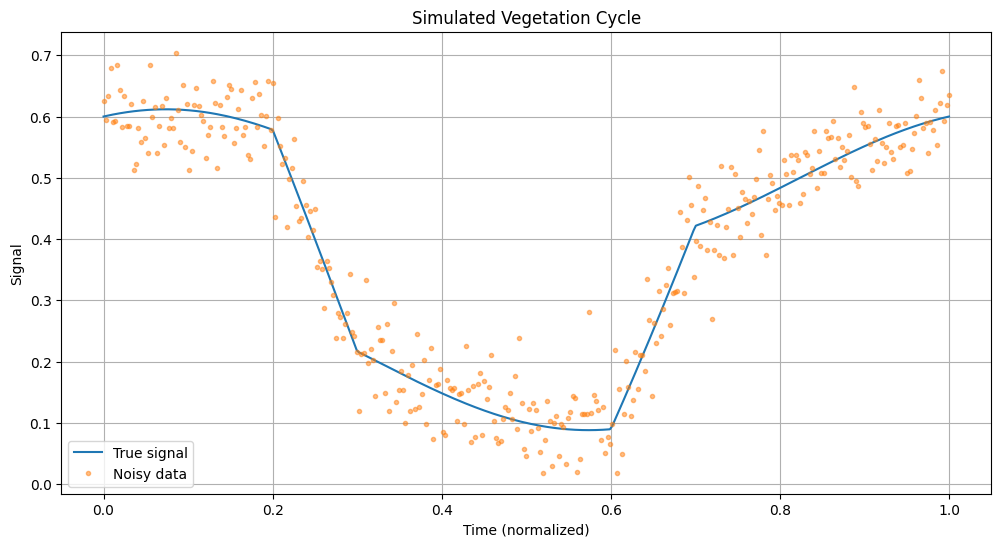

Final parameters:
Amplitude (harmonic): 0.1118
Phase (harmonic): 0.4636
Amplitude: 0.6000
Offset: 0.2000
t1: 0.2000
t2: 0.3000
t3: 0.6000
t4: 0.7000


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ramp(t):
    return np.clip(t, 0, 1)

def simulate_vegetation_cycle(t, params):
    A, B, c, a1, a2, t1, t2, t3, t4 = params
    
    # Harmonic component
    harmonic = A * np.cos(2 * np.pi * t) + B * np.sin(2 * np.pi * t)
    
    # Piecewise linear component
    piecewise = c + a1 * ramp((t - t1) / (t2 - t1)) + a2 * ramp((t - t3) / (t4 - t3))
    
    return harmonic + piecewise

# Simulate data
np.random.seed(42)
t = np.linspace(0, 1, 365)
true_params = [0.1, 0.05, 0.5, -0.3, 0.3, 0.2, 0.3, 0.6, 0.7]
y_true = simulate_vegetation_cycle(t, true_params)
y_noisy = y_true + np.random.normal(0, 0.05, size=len(t))

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(t, y_true, label='True signal')
plt.plot(t, y_noisy, '.', alpha=0.5, label='Noisy data')
plt.xlabel('Time (normalized)')
plt.ylabel('Signal')
plt.title('Simulated Vegetation Cycle')
plt.legend()
plt.grid(True)
plt.show()

# Function to convert optimized parameters to interpretable parameters
def convert_params(params):
    A, B, c, a1, a2, t1, t2, t3, t4 = params
    
    amplitude_harmonic = np.sqrt(A**2 + B**2)
    phase_harmonic = np.arctan2(B, A)
    amplitude = abs(a1) + abs(a2)
    offset = c + min(0, a1) + min(0, a2)
    
    return [amplitude_harmonic, phase_harmonic, amplitude, offset, t1, t2, t3, t4]

# Convert and display the parameters
final_params = convert_params(true_params)
param_names = ['Amplitude (harmonic)', 'Phase (harmonic)', 'Amplitude', 'Offset', 't1', 't2', 't3', 't4']

print("Final parameters:")
for name, value in zip(param_names, final_params):
    print(f"{name}: {value:.4f}")